In [81]:

import numpy as np
import math
from scipy.stats import binom, poisson, norm

getallen = [2, 12, 15, 16, 18, 22, 24, 25, 28, 29, 30, 25, 40, 42, 46]

## Basis functies
Afronden op 2 getallen na de komma

In [82]:
print(format(10.254874, '.4g'))



10.25


## Centrummaten en speidingsmaten
Gemiddele is de verwachte waarde

In [83]:
print(np.mean(getallen))

24.933333333333334


Standaard afwijking is hoeveel afwijking er is op de verwachte waarden

In [84]:
print(np.std(getallen))





11.38107591086576


## Kansverdelingen

Wat is een kansverdeling?
* doe een theoretische oneindige steekproef
* bepaal de relatieve frequenties van iedere waarde
* deze tabel noemen we "kansverdeling"



Voorbeeld: gooi met 2 dobbelstenen

      worp  som
1   (1, 1)    2
2   (1, 2)    3
3   (1, 3)    4
4   (1, 4)    5
5   (1, 5)    6
6   (1, 6)    7
7   (2, 1)    3
8   (2, 2)    4
9   (2, 3)    5
10  (2, 4)    6
11  (2, 5)    7
12  (2, 6)    8
13  (3, 1)    4
14  (3, 2)    5
15  (3, 3)    6
16  (3, 4)    7
17  (3, 5)    8
18  (3, 6)    9
19  (4, 1)    5
20  (4, 2)    6
21  (4, 3)    7
22  (4, 4)    8
23  (4, 5)    9
24  (4, 6)   10
25  (5, 1)    6
26  (5, 2)    7
27  (5, 3)    8
28  (5, 4)    9
29  (5, 5)   10
30  (5, 6)   11
31  (6, 1)    7
32  (6, 2)    8
33  (6, 3)    9
34  (6, 4)   10
35  (6, 5)   11
36  (6, 6)   12

Kans op minder dan 4 ogen: 8.3%
Kans op meer dan 4 ogen: 91.7% 

Waarden van de mogelijke uitkomsten
2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 

De kansen voor elke mogelijke worp
0.027777777777777776
0.05555555555555555
0.08333333333333333
0.1111111111111111
0.1388888888888889
0.16666666666666666
0.1388888888888889
0.1111111111111111
0.08333333333333333
0.05555555555555555
0.027777777777777776

Mu is de verwa

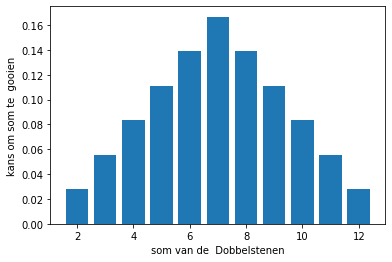

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dobbelstenen = pd.DataFrame([((d1, d2), d1 + d2) for d1 in range(1, 7) for d2 in range(1, 7)],
                            columns=['worp', 'som'],
                            index=[i for i in range(1, 37)])

print(dobbelstenen)

# Kans op minder dan = de kans op een 1 OF een 2 OF en 3
minder_dan_vier_ogen = len(dobbelstenen.query('som < 4')) / len(dobbelstenen) * 100
meer_dan_vier_ogen = (1 - len(dobbelstenen.query('som < 4')) / len(dobbelstenen)) * 100
print()
print("Kans op minder dan 4 ogen: %.1f" % minder_dan_vier_ogen + "%")
print("Kans op meer dan 4 ogen: %.1f" % meer_dan_vier_ogen + "% \n")

waarde = range(2, 13)
print("Waarden van de mogelijke uitkomsten")
for i in waarde:print(i, end=', ')
print()

kans = pd.Series([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36.0
print()
print("De kansen voor elke mogelijke worp")
for i in kans:print(i)
print()

plt.figure()
plt.bar(waarde, kans)
plt.xlabel("som van de  Dobbelstenen")
plt.ylabel("kans om som te  gooien")
plt.show()

mu = (waarde * kans).sum()
print("Mu is de verwachte waarde")
print(mu)
print()

sigma = np.sqrt(((waarde - mu) ** 2 * kans).sum())
print("Sigma is afwijking van de verwachte waarde")
print(sigma)


## Binomiaalverdeling
 Gebruiken als we willen weten wat de kans is op een success of geen success een aantal keer achter elkaar.
 $\binom{n}{k}$

### Voorwaarden
 * je doet een experiment een aantal keer achter elkaar.
 * de uitkomst van het experiment beïnvloedt het resultaat van het volgende experiment niet.
 * de uitkomst van het experiment kan slechts 2 mogelijke waarden opleveren.
 * je weet wat de kans is om de 2 waarden te verkrijgen als je het experiment 1 keer uitvoert.
 * je vraagt je af wat de kans is dat je een aantal keren een bepaalde waarde verkrijgt.

### Eigenschappen
N = aantal keer dat het experiment plaats vindt
<pre>bv. 6 keer een rood licht, 10 stundenten, 5 vragen</pre>
K = aantal keer dat je een succes of geen success wil.
<pre>bv. hoeveel keer kop, hoeveel vragen juist</pre>
P = de kans op de gebeurtenis.
    <pre>bv. 1/2 0.50</pre>

### Sigma & Mu
σ = $\sqrt{n.p()1-p)}$
    <pre>De standaard afwijking</pre>
µ = n.p
    <pre>Het verwachte gemiddelde</pre>

#### Functies
```python
stats.binom.pmf(k=2,n=4,p=2/6) Kans op een succes.
```

```python
1 - stats.binom.pmf(k=2,n=4,p=2/6) Kans op geen sucess.
```

```python
stats.binom.cmf(k=2,n=4,p=2/6) Kans op x aantal keer of minder.
```

```python
1 - stats.binom.cmf(k=2,n=4,p=2/6) Kans op x aantal keer of meer.
```

## Possionverdeling
De kans dat de gebeurtenis zich K keer voordoet in een bepaalde tijdspanne.

### Voorwaarden
* een bepaalde gebeurtenis doet zich gemiddeld een aantal keer voor per tijdseenheid, maar
er zit variatie op
* we vragen ons af wat de kans is dat deze gebeurtenis zich een aantal keer zal voordoen
binnen een bepaalde tijd

### Eigenschappen
K = de kans dat de gebeurtenis zich een aantal keer zal voordoen binnen een bepaalde tijd
<pre>bv. de kans dat er meer dan 10 oproepen per uur zouden binnen komen</pre>

α(mu) = gemiddeld aantal keer dat een gebeurtenis zicht voordoet
<pre>bv. op een help-desk komen er gemiddeld 3 oproepen per uur binnen</pre>


### Sigma & Mu
σ = $\sqrt{α}$
    <pre>De standaard afwijking</pre>
µ = reed gekent
    <pre>Het verwachte gemiddelde</pre>

#### Functies
```python
stats.poisson.pmf(10, 3) Kans dat er 10 oproepen binnen komen als we er gemiddeld 3 krijgen
```

```python
1 - stats.poisson.pmf(10, 3) Kans dat er geen 10 oproepen binnen komen als we er gemiddeld 3 krijgen
```

```python
stats.poisson.cdf(10, 3) Kans op minder dan 10 oproepen als we er gemiddeld 3 krijgen
```
```python
1 - stats.poisson.cdf(10, 3) Kans op meer dan 10 oproepen als we er gemiddeld 3 krijgen
```
#### inverse cumulatieve verdeling
```python
stats.poisson.ppf(0.95, 3) hoeveel mensen we in dienst  hebben om 95% van
de tijd de klanten te kunnen helpen
```

## Normaal verdeling
Is een continue kansverdeling met twee parameters, de verwachtingswaarde µ en de standaardafwijking
σ waarvan een kansdichtheid wordt terug gegeven die zich tussen een bepaalde waarde bevindt.

### Voorwaarden
* je beschouwt een continue variabele
* je kent de waarden van de verwachte waarde (gemiddelde) en de standaardafwijking
* de waarden zijn symmetrisch verdeeld rond de verwachte waarde
* je vraagt je af wat de kans is dat een gemeten waarde tussen twee grenzen ligt

### Eigenschappen
µ(mu) = de gemiddelde waarden die we verwachten
<pre>bv. een lengte van 180cm</pre>

σ(sigma) = de standaard afwijking
<pre>bv. een lengte van 10cm</pre>

We afvragen ons af wat de kans is dat een student
tussen de 175cm en 180cm groot is.

#### Functies
```python
stats.norm.pdf(x=150, loc=180, scale=10) Kans dat er iemand een lengte heeft van 150
```
```python
stats.norm.cdf = kans op minder dan
```
```python
1 - stats.norm.cdf = kans op meer dan
```

```python
format(stats.norm.cdf(x=52,loc=50,scale=5)-norm.cdf(x=42,loc=-50,scale=5),'.4g')
#tussen de 42 en 52 valt?
```

```python
format(stats.norm.cdf(x=52,loc=50,scale=5)-norm.cdf(x=42,loc=-50,scale=5),'.4g')
#tussen de 42 en 52 valt?
```

```python
print(format(stats.norm.ppf(q=0.16, loc=100, scale=15),'.4g'))
#q = omzetten in aantallen (inverse van cdf functie)
```





















